<a href="https://colab.research.google.com/github/rositx/amazon-product-reviews-analysis/blob/main/playstore_data_collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Collect all play store data

In [1]:
#import statements
import requests
from bs4 import BeautifulSoup
from lxml import html
from datetime import datetime
import pandas as pd
from datetime import datetime


In [2]:
#get all possible urls
all_urls=["https://play.google.com/store/games?device=phone&hl=en&gl=US","https://play.google.com/store/search?q=Multiplayer+games&c=apps&hl=en&gl=US","https://play.google.com/store/search?q=Platformer+games&c=apps&hl=en&gl=US","https://play.google.com/store/apps/category/GAME_ARCADE?hl=en&gl=US","https://play.google.com/store/search?q=Offline+games&c=apps&hl=en&gl=US","https://play.google.com/store/search?q=Shooter+games&c=apps&hl=en&gl=US","https://play.google.com/store/search?q=Competitive+multiplayer+games&c=apps&hl=en&gl=US","https://play.google.com/store/search?q=Realistic+games&c=apps&hl=en&gl=US","https://play.google.com/store/apps/category/GAME_CASUAL?hl=en&gl=US"]
apps_ids=[]

In [3]:
def get_app_ids(app_ids,all_urls):
  #go to each url to get app ids
  for url in all_urls:
    response = requests.get(url)
    content = html.fromstring(response.content)
    app_links = content.xpath('//a')
    #go through all links
    for link in app_links:
      apps=link.get("href")
      #check for valid links
      if(apps[0:23]=='/store/apps/details?id='):
        #store app ids in the list
        app_ids.append(apps[23:])

In [4]:
get_app_ids(apps_ids,all_urls)
print(len(apps_ids))
apps_ids=list(set(apps_ids))
len(apps_ids)

500


304

In [5]:
def get_all_data(app_id):
  app_url='https://play.google.com/store/apps/details?id='+app_id+'&hl=en&gl=US'
  response = requests.get(app_url)
  content = html.fromstring(response.content)
  # app_name = soup.find("h1", class_="Fd93Bb ynrBgc xwcR9d").text.strip()
  app_name_element=content.xpath('//h1')
  app_name=app_name_element[0].text_content()
  editor_choice_element = content.xpath('//span[@class="YVLXxf"]')
  editor_choice=True
  if editor_choice_element==[]:
    editor_choice=False
  price_element = content.xpath('//div[@class="VfPpkd-dgl2Hf-ppHlrf-sM5MNb"]')[0].text_content()
  if(price_element=='Install'):
    price=0
  elif(price_element[0]=='$'):
    price=float(price_element.strip('$').split()[0])
  else:
    return

  content_rating_element=content.xpath('//span[@itemprop="contentRating"]')
  content_rating=content_rating_element[0].text_content()
  downloads_element = content.xpath('//div[@class="ClM7O"]')
  downloads =downloads_element[1].text_content().strip().replace('M+', '000000').replace('B+', '000000000').replace('K+', '000')
  rating_value= downloads_element[0].text_content().strip().replace('star', '')
  tags_element=content.xpath('//div[@class="VfPpkd-LgbsSe VfPpkd-LgbsSe-OWXEXe-INsAgc VfPpkd-LgbsSe-OWXEXe-dgl2Hf Rj2Mlf OLiIxf PDpWxe P62QJc LQeN7 LMoCf"]')
  last_update=datetime.strptime(content.xpath('//div[@class="xg1aie"]')[0].text_content(), '%b %d, %Y').date()
  tags=[]
  for tag in tags_element:
    tags.append(tag.text_content())

  return app_name,downloads,rating_value,editor_choice,content_rating,price,tags,last_update
print(get_all_data('com.playrix.township'))
get_all_data(apps_ids[11])

('Township', '100000000', '4.7', False, 'Everyone', 0, ['Simulation', 'Management', 'Farming', 'Casual', 'Single player', 'Stylized'], datetime.date(2024, 1, 16))


('Seven Knights Idle Adventure',
 '1000000',
 '4.4',
 False,
 'Everyone 10+',
 0,
 ['Role Playing', 'Idle RPG', 'Single player', 'Stylized', 'Anime'],
 datetime.date(2024, 2, 21))

In [19]:
print(get_all_data("com.mobirix.dvking"))

None


In [22]:
test = []
# Assuming apps_ids is a list or iterable containing app IDs
i=0
for app_id in apps_ids:
    data = get_all_data(app_id)
    if data is not None and data[1]!='':
      test.append(data)

df = pd.DataFrame(test, columns=['app_name', 'downloads', 'rating_value', 'editor_choice', 'content_rating', 'price', 'tags', 'last_update'])


In [23]:
df

,app_name,downloads,rating_value,editor_choice,content_rating,price,tags,last_update
0,Zombie Tsunami,100000000,4.5,True,Everyone 10+,0.00,"[Action, Platformer, Runner, Arcade, Single pl...",2024-01-19
1,Temple Run,500000000,4.3,False,Everyone,0.00,"[Action, Platformer, Runner, Arcade, Single pl...",2023-11-29
2,Call of Duty: Mobile Season 2,100000000,4.3,True,Mature 17+,0.00,"[Action, Shooter, Tactical shooter, Multiplaye...",2024-01-29
3,Reigns,1000000,4.5,False,Teen,2.99,"[Adventure, Interactive story, Casual, Stylized]",2023-10-12
4,Blood Strike,10000000,4.6,False,Teen,0.00,"[Action, Shooter, Tactical shooter, Casual, Mu...",2024-02-01
...,...,...,...,...,...,...,...,...
295,Trivia Crack,100000000,4.4,True,Everyone,0.00,"[Trivia, Casual, Multiplayer, Competitive mult...",2024-02-26
296,Primrose Lake 5 - Mystery game,10000,4.8,False,Everyone 10+,0.00,[Casual],2024-02-08
297,Golf Battle,50000000,4.5,False,Everyone,0.00,"[Sports, Golf, Casual, Multiplayer, Competitiv...",2024-01-25
298,Ludo Kingâ¢,1000000000,4.0,False,Everyone,0.00,"[Board, Abstract strategy, Ludo, Casual, Multi...",2024-02-08


## tag based analysis

In [24]:
all_tags=[]
no_of_games_per_tag=[]
for tags in df['tags']:
  all_tags.extend(tags)

all_tags=list(set(all_tags))
len(all_tags)

116

In [25]:
for tag in all_tags:
  filtered_rows = df[df['tags'].apply(lambda tags: tag in tags)]
  tags_data=(tag,filtered_rows.shape[0])
  no_of_games_per_tag.append(tags_data)

In [26]:
tags_count=pd.DataFrame(no_of_games_per_tag,columns=['tags','no_of_games'])
tags_count=tags_count.sort_values('no_of_games',ascending=False)
tags_count_h=tags_count.head(20)

<ipython-input-27-0ae3fa3b907b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='tags', x='no_of_games',data=tags_count_h, palette="hls",legend=True,)


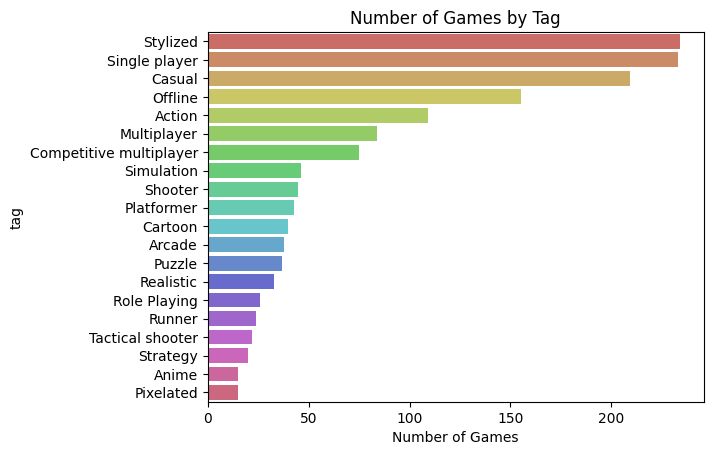

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(y='tags', x='no_of_games',data=tags_count_h, palette="hls",legend=True,)


# Add a title and axis labels
plt.title("Number of Games by Tag")
plt.xlabel("Number of Games")
plt.ylabel("tag")

# Show the plot
plt.show()



In [28]:
df['downloads']=df['downloads'].astype(int)
df['rating_value']=df['rating_value'].astype(float)
df['last_update']=pd.to_datetime(df['last_update'])
df.dtypes

app_name                  object
downloads                  int64
rating_value             float64
editor_choice               bool
content_rating            object
price                    float64
tags                      object
last_update       datetime64[ns]
dtype: object

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   app_name        300 non-null    object        
 1   downloads       300 non-null    int64         
 2   rating_value    300 non-null    float64       
 3   editor_choice   300 non-null    bool          
 4   content_rating  300 non-null    object        
 5   price           300 non-null    float64       
 6   tags            300 non-null    object        
 7   last_update     300 non-null    datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 16.8+ KB


## Data analysis

In [30]:
df_highest_downloads=df[df['downloads']==df['downloads'].max()]
df_highest_downloads.sort_values('rating_value',ascending=False)

,app_name,downloads,rating_value,editor_choice,content_rating,price,tags,last_update
9,Subway Surfers,1000000000,4.6,True,Everyone 10+,0.0,"[Action, Platformer, Runner, Arcade, Single pl...",2024-02-23
27,Candy Crush Saga,1000000000,4.6,True,Everyone,0.0,"[Puzzle, Match 3, Casual, Single player, Styli...",2024-02-26
30,8 Ball Pool,1000000000,4.5,True,Everyone,0.0,"[Sports, Billiards, Casual, Multiplayer, Compe...",2024-02-19
165,Temple Run 2,1000000000,4.4,True,Everyone 10+,0.0,"[Action, Platformer, Runner, Arcade, Single pl...",2024-01-12
278,My Talking Tom,1000000000,4.4,False,Everyone 10+,0.0,"[Simulation, Care, Pet, Casual, Single player,...",2024-02-15
207,Free Fire: The Chaos,1000000000,4.2,True,Mature 17+,0.0,"[Action, Shooter, Tactical shooter, Casual, St...",2024-01-14
298,Ludo Kingâ¢,1000000000,4.0,False,Everyone,0.0,"[Board, Abstract strategy, Ludo, Casual, Multi...",2024-02-08


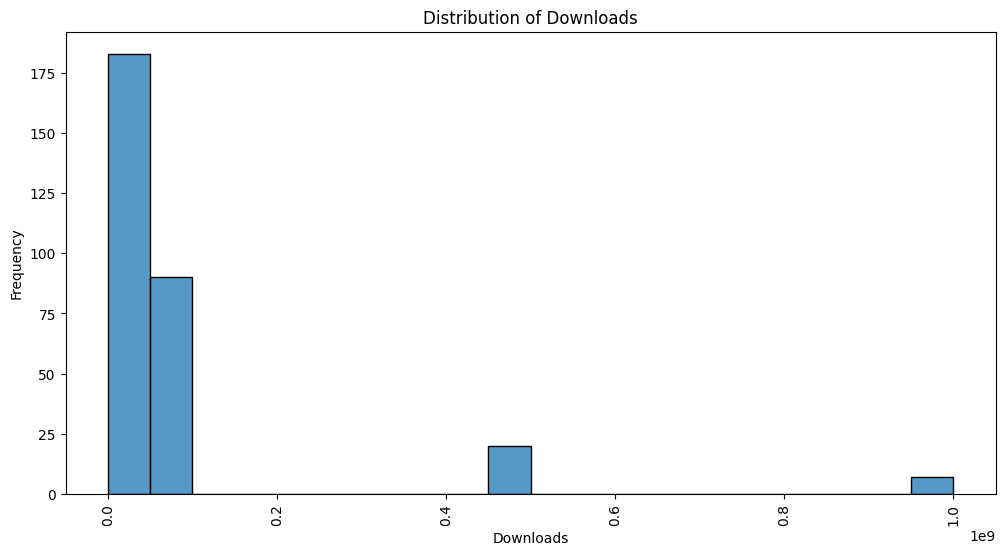

In [33]:
plt.figure(figsize=(12, 6))
sns.histplot(df['downloads'], bins=20)
plt.xticks(rotation=90)
plt.title('Distribution of Downloads')
plt.xlabel('Downloads')
plt.ylabel('Frequency')
plt.show()


## general plots


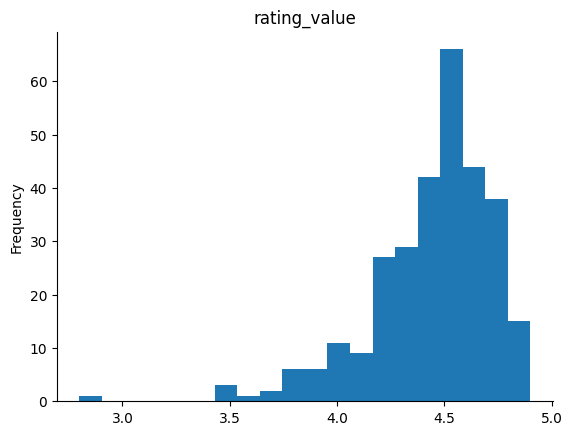

In [35]:
df['rating_value'].plot(kind='hist', bins=20, title='rating_value')
plt.gca().spines[['top', 'right',]].set_visible(False)

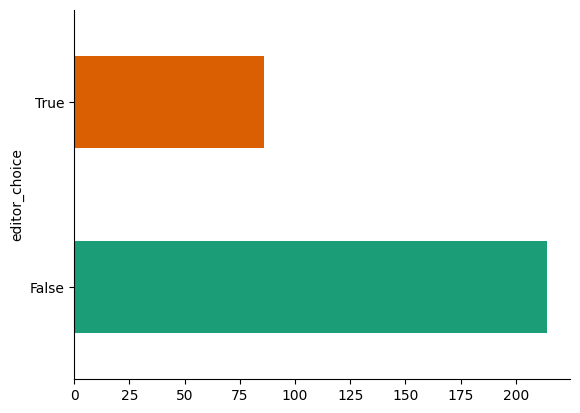

In [36]:
df.groupby('editor_choice').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

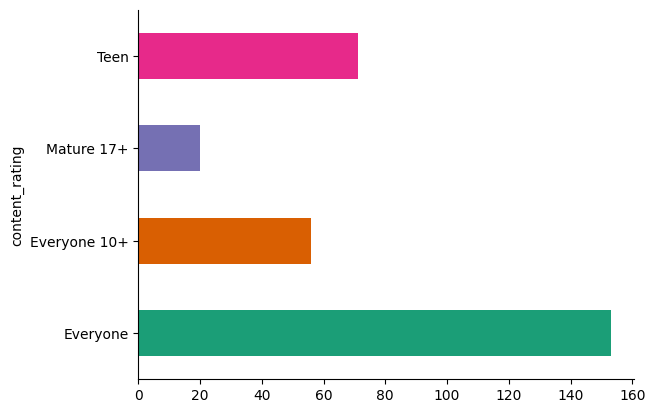

In [37]:
df.groupby('content_rating').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)